# Visulization on Convolutional Neural Networks

## Introduction

One of the most debated topics in deep learning is how to interpret and understand a trained model – particularly in the context of high risk industries like healthcare. The term “black box” has often been associated with deep learning algorithms. How can we trust the results of a model if we can’t explain how it works? It’s a legitimate question. Take the example of a deep learning model trained for detecting cancerous tumours. The model tells you that it is 99% sure that it has detected cancer – but it does not tell you why or how it made that decision.Did it find an important clue in the MRI scan? Or was it just a smudge on the scan that was incorrectly detected as a tumour? This is a matter of life and death for the patient and doctors cannot afford to be wrong.

Next, we will explore how to visualize a convolutional neural network (CNN), a deep learning architecture particularly used in most state-of-the-art image based applications. We will get to know the importance of visualizing a CNN model, and the methods to visualize them. We will also take a look at a use case that will help you understand the concept better.

**Note:** Here I assume that you know the basics of deep learning and have previously worked on image processing problems using CNN such training a classifier on specified dataset. This code is written in **PyTorch with CPU version(version 0.4.1)** but also work in version **1.0.0**. For more details of source code, please check my GitHub [repository](https://github.com/zhangrong1722/understanding_cnn)(Welcome stars).

**Table of Contents**

- Importance of Visualizing a CNN model
- Methods of Visualization
    1. Preliminary Methods
        * Plot Model Architecture
    2. Classes Prototype Generation
    3. Gradient based Methods
        * Saliency Map
    4. Feature activation map
        * Class Activation Map 
        * Gradient-weighted Class Activation Map
- Discussions

## Importance of Visualizing a CNN model

As we have seen in the cancerous tumour example above, it is absolutely crucial that we know what our model is doing – and how it’s making decisions on its predictions. Typically, the reasons listed below are the most important points for a deep learning practitioner to remember:

1. Understanding how the model works
2. Assistance in Hyperparameter tuning
3. Finding out the failures of the model and getting an intuition of why they fail
4. Explaining the reasons behind the given decisions.

## Methods of Visualizing a CNN model

Broadly the methods of Visualizing a CNN model can be categorized into three parts based on their internal workings:

1. Preliminary methods – Simple methods which show us the overall structure of a trained model
2. Activation based methods – In these methods, we decipher the activations of the individual neurons or a group of neurons to get an intuition of what they are doing
3. Gradient based methods – These methods tend to manipulate the gradients that are formed from a forward and backward pass while training a model

**Note:** All experiments use [MNIST](http://yann.lecun.com/exdb/mnist/) dataset for simplification in default, where CPU environment is enough to cope with training and visulizing neural networks. The visulization on neural networks usually needs to train a classifier(not end-to-end) in advance, which is well understandable. Hence, for better readability in this presentation, we will not show the snippets of training classifier on MNIST and only point out where corresponding scripts lie such that you also can get access to full code.

All is done. Let's start the course now.

### 1. Preliminary Methods
#### 1.1 Plotting model architecture

The simplest thing you can do is to print/plot the model. Here, you can also print the shapes of individual layers of neural network and the parameters in each layer. In PyTorch, you can install a external library called [torchsummaryX](https://github.com/nmhkahn/torchsummaryX), which can print the details conveniently such as layers name and toal params. Let's take the example of plotting the model architecture of `AlexNet`:

In [2]:
# pip install torchsummaryX 
from torchsummaryX import summary
from torchvision.models import alexnet, resnet34, resnet50, densenet121, vgg16, vgg19, resnet18
import torch

summary(alexnet(pretrained=False), torch.zeros((1, 3, 224, 224)))

                              Kernel Shape      Output Shape Params (K)  \
Layer                                                                     
0_features.Conv2d_0        [3, 64, 11, 11]   [1, 64, 55, 55]     23.296   
1_features.ReLU_1                        -   [1, 64, 55, 55]          -   
2_features.MaxPool2d_2                   -   [1, 64, 27, 27]          -   
3_features.Conv2d_3        [64, 192, 5, 5]  [1, 192, 27, 27]    307.392   
4_features.ReLU_4                        -  [1, 192, 27, 27]          -   
5_features.MaxPool2d_5                   -  [1, 192, 13, 13]          -   
6_features.Conv2d_6       [192, 384, 3, 3]  [1, 384, 13, 13]    663.936   
7_features.ReLU_7                        -  [1, 384, 13, 13]          -   
8_features.Conv2d_8       [384, 256, 3, 3]  [1, 256, 13, 13]    884.992   
9_features.ReLU_9                        -  [1, 256, 13, 13]          -   
10_features.Conv2d_10     [256, 256, 3, 3]  [1, 256, 13, 13]     590.08   
11_features.ReLU_11      

,Kernel Shape,Output Shape,Params (K),Mult-Adds (M)
Layer,,,,
0_features.Conv2d_0,"[3, 64, 11, 11]","[1, 64, 55, 55]",23.296,70.276800
1_features.ReLU_1,-,"[1, 64, 55, 55]",NaN,NaN
2_features.MaxPool2d_2,-,"[1, 64, 27, 27]",NaN,NaN
3_features.Conv2d_3,"[64, 192, 5, 5]","[1, 192, 27, 27]",307.392,223.948800
4_features.ReLU_4,-,"[1, 192, 27, 27]",NaN,NaN
5_features.MaxPool2d_5,-,"[1, 192, 13, 13]",NaN,NaN
6_features.Conv2d_6,"[192, 384, 3, 3]","[1, 384, 13, 13]",663.936,112.140288
7_features.ReLU_7,-,"[1, 384, 13, 13]",NaN,NaN
8_features.Conv2d_8,"[384, 256, 3, 3]","[1, 256, 13, 13]",884.992,149.520384


From the printed abstract, we can know lots of basic information about AlexNet such as total parameters(61,100.84K), all layers in details including name, input/output channels, parameters and kernel size.

### 2. Classes Prototype Generation

Taking the example of classification tasks, given a random image, a trained model can predict its category correctly. We may take it for granted that this model seems to have learnt distinctively semantic features especially when the image is classfied correctly with high score. However, This conclusion may fail under the interference of complex external factors such as highly variant background environment where the classifier may make decision by surrounding objects rather than main object itself. In other word, we need another way to check whether the classifier really learn distinctively semantic features for all classes. A popular way to achieve this is to generate its corresponding prototypes for all classes, which contain the most fundamental information about features. Hence, generated class prototype will be more likely to filter the irrelevant information and focus on the main object itself. 

#### 2.1 Create Neural Network

Firstly, we build a plain neural network only contraining 3 fully connected layers. For more details, please check the scirpt `class_prototype/model.py`.

In [3]:
from torch import nn

class MNIST_DNN(nn.Module):
    def __init__(self):
        super(MNIST_DNN, self).__init__()
        self.dense1 = nn.Linear(784, 512)
        self.dense2 = nn.Linear(512, 100)
        self.dense3 = nn.Linear(100, 10)
    def forward(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

#### 2.2 Training Clssifier
Before achieving this intersting idea, we need to train a classifier firstly. Here we train a simply fully connected network with best accuracy=93.1% on testing sets.

#### 2.3  Generate Classes Prototype

Regarding to the best accuray=93.1% on testing sets, actually this is a poor performance on MNIST because we only build a fully connected network and do nothing with optimization even no activation function.

Next we will generate  corresponding classes prototype for all categories from digit 0 to digit 9. To do this, we need a few tricks as following:

1. Initializing input with random noise. Here, we initialize input from standard normal distribution.
2. Freezing except updating the initial input the parameters of model in backpropagation stage.

To make the distribution of input closer to the distribution of real data, we also calculate the mean squared error between pixel-wise mean for each categories and input as regularization term, which is defined by $z$. Therefore, the loss function is as following:

$$
\begin{equation}
\mathcal{L}=cross\_entropy(f(x),y)+\lambda mse\_loss(x, z)
\end{equation}
$$

where we use $f(.)$ denote the pretrained model, $x$ denote the input, $y$ denote corresponding label, $cross\_entropy$ and $mse\_loss$ denote cross entropy error and mean squared error, repectively. Note that we need to set the mode of this model to eval.

In [76]:
img_input = Image.open('./dataset/test_imgs/8.png')
img_input = np.array(img_input).reshape(-1)
x_prototype = torch.Tensor([img_input, img_input])
print(x_prototype.shape)
y_prototype = torch.linspace(1, 3, 2)
print(y_prototype.shape)
print(y_prototype)
y_prototype = torch.Tensor([3, 1])
print(y_prototype.shape)

torch.Size([2, 784])
torch.Size([2])
tensor([1., 3.])
torch.Size([2])


In [95]:
imgs_means = get_img_means('./dataset/mnist')
print(imgs_means)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [98]:
import torch
from torch.autograd import Variable
from torch import nn, optim
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

from class_prototype.model import MNIST_DNN
from utils.utils import set_parameters_static
from utils.utils import get_img_means

lmda = 0.1

class Prototype(nn.Module):
    def __init__(self):
        super(Prototype, self).__init__()


criterion = nn.CrossEntropyLoss()
regular = nn.MSELoss()

model = MNIST_DNN()

model.load_state_dict(torch.load('./class_prototype/MNIST_CNN.pkl'))
# don't update parameters of original model
model = set_parameters_static(model)

# init images and labels:0-9
x_prototype = torch.zeros(10, 784)
'''
img_input = Image.open('./dataset/test_imgs/8.png')
img_input = np.array(img_input).reshape(-1)
img_input = Variable(torch.Tensor(img_input))
for i in range(len(x_prototype)):
    x_prototype[i] = img_input
'''
transform1 = transforms.Compose([
    transforms.ToTensor()
])
img_input = Image.open('./dataset/test_imgs/8.png')
img_input = transform1(img_input)
img_input = img_input.reshape(-1)
for i in range(len(x_prototype)):
    x_prototype[i] = img_input
y_prototype = torch.linspace(0, 9, 10)
y_prototype = y_prototype.type(torch.LongTensor)

x_prototype = Variable(x_prototype, requires_grad=True)
y_prototype = Variable(y_prototype)

imgs_means = get_img_means('./dataset/mnist')
imgs_means = Variable(imgs_means)

optimizer = optim.Adam([x_prototype], lr=0.01)
print('begin training...')
for i in range(10000):
    optimizer.zero_grad()
    logits_prototype = model(x_prototype)
    cost_protype = criterion(logits_prototype, y_prototype) + lmda * regular(x_prototype, imgs_means)
    cost_protype.backward()
    optimizer.step()
    if i % 500 == 0:
        print('cost_protype={:.6f}'.format(cost_protype.item()))

begin training...
cost_protype=7.609861
cost_protype=0.006011
cost_protype=0.004669
cost_protype=0.003551
cost_protype=0.002647
cost_protype=0.001927
cost_protype=0.001366
cost_protype=0.000943
cost_protype=0.000639
cost_protype=0.000433
cost_protype=0.000301
cost_protype=0.000222
cost_protype=0.000180
cost_protype=0.000158
cost_protype=0.000148
cost_protype=0.000144
cost_protype=0.000143
cost_protype=0.000143
cost_protype=0.000143
cost_protype=0.000142


We use pretrained weights to initialize this classifier. Then freeze the model parameters and only train input tensor using Adam optimizer, where the loss decrease stably until 0.0001. After training for 10000 steps, we can show class prototype using `plot` package as following.

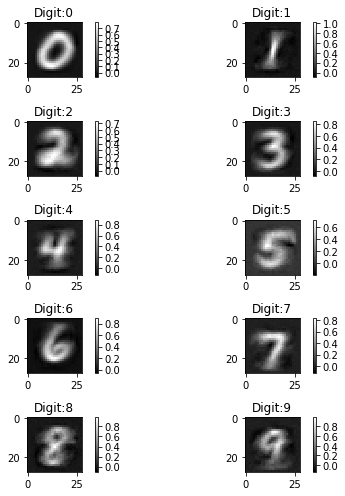

In [99]:
x_prototype = x_prototype.data.numpy()

assert x_prototype.shape == (10, 784)
plt.figure(figsize=(7, 7))
for i in range(5):
    left = x_prototype[2*i,:].reshape(28, 28)
    plt.subplot(5, 2, 2 * i +1)
    plt.imshow(left, cmap='gray', interpolation='none')
    plt.title('Digit:{}'.format(2 * i))
    plt.colorbar()

    right = x_prototype[2*i+1,:].reshape(28, 28)
    plt.subplot(5, 2, 2 * i + 2)
    plt.imshow(right, cmap='gray', interpolation='none')
    plt.title('Digit:{}'.format(2 * i + 1))
    plt.colorbar()

plt.tight_layout()
plt.show()

### 3 Gradient based Methods

In gradient-based algorithms, the gradient of the output with respect to the input is used for constructing the saliency maps. The algorithms in this class differ in the way the gradients are modified during backpropagation. Relevance score based algorithms try to attribute the relevance of each input pixel by backpropagating the probability score instead of the gradient. However, all of these methods involve a single forward and backward pass through the net to generate heatmaps as opposed to multiple forward passes for the perturbation based methods. Evidently, all of these methods are computationally cheaper as well as free of artifacts originating from perturbation techniques. 

#### 3.1 Saliency Map

In this section we describe how a classification ConvNet can be queried about the spatial support of
a particular class in a given image. Given an image $I_0$, a class $c$, and a classification ConvNet with
the class score function $S_c(I)$, we would like to rank the pixels of $I_0$ based on their influence on the
score $S_c(I_0)$.

We start with a motivational example. Consider the linear score model for the class $c$:
$$S_c(I) = w^T_cI + b_c$$

where the image I is represented in the vectorised (one-dimensional) form, and wc and bc are respectively the weight vector and the bias of the model. In this case, it is easy to see that the magnitude
of elements of w defines the importance of the corresponding pixels of I for the class $c$.

In the case of deep ConvNets, the class score $S_c(I)$ is a highly non-linear function of $I$, so the
reasoning of the previous paragraph can not be immediately applied. However, given an image
$I_0$, we can approximate $S_c(I)$ with a linear function in the neighbourhood of $I_0$ by computing the
first-order Taylor expansion:

$$Sc(I) ≈ w^TI + b$$

where $w$ is the derivative of $S_c$ with respect to the image $I$ at the point (image) $I_0$:

$$w=\frac{\partial S_c}{\partial I} | I_0$$

#### 3.1.1 Train CNN Classifier

Similarly, we build and train a CNN classifier well. The whole process including CNN definition also is listed as following. Because the code of training classifier actually is greatly similar, you also can just skim to and focus on the processing of computing saliency maps for digit from 0 to 9. For fully source code of training classifier, please check the script `sensitivity_analysis/training.py`.

In [6]:
import torch
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn, optim


class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 32, 3, stride=1, padding=1), nn.ReLU(True),
                                    nn.MaxPool2d(2, 2, padding=1), nn.Dropout(p=0.7))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(True),
                                    nn.MaxPool2d(2, 2, padding=1), nn.Dropout(p=0.7))
        self.layer3 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=1, padding=1), nn.ReLU(True),
                                    nn.MaxPool2d(2, 2, padding=1), nn.Dropout(p=0.7))
        self.layer4 = nn.Sequential(nn.Linear(128 * 5 * 5, 625), nn.ReLU(True),
                                    nn.Dropout(0.5))
        self.layer5 = nn.Sequential(nn.Linear(625, 10))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(-1, 128 * 5 * 5)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

#### 3.1.2 Compute saliency maps

After training the CNN classfier successfully with best accuracy =99.3% on testing sets, we will compute the derivative of CNN output scores with respect to the input images from digit 0 to digit 9.

In [7]:
import torch
from torch.autograd import Variable

from sensitivity_analysis.model import MNIST_CNN
from utils.utils import get_all_digit_imgs

import numpy as np
import matplotlib.pyplot as plt

# the model is trained and saved on gpu and load weight on cpu
is_training_on_gpu = False
model = MNIST_CNN()
if is_training_on_gpu:
    weights = torch.load('sensitivity_analysis/cnn_weights.pkl', map_location=lambda storage, loc: storage)
else:
    weights = torch.load('sensitivity_analysis/cnn_weights.pkl')
model.load_state_dict(weights)

imgs = get_all_digit_imgs('./dataset/mnist')
print(imgs.shape)
imgs = Variable(imgs, requires_grad=True)

logits = model(imgs)

logits.backward(torch.ones(logits.size()))

gradients = imgs.grad.data.numpy()

torch.Size([10, 1, 28, 28])


Now, we can show the results using `plt` package.

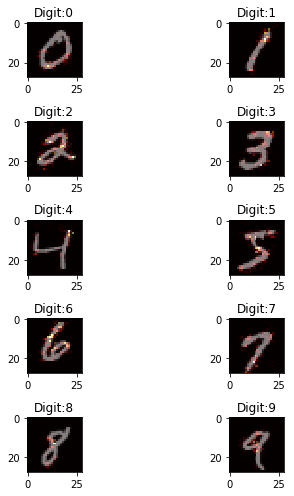

In [8]:
assert gradients.shape == (10, 1, 28, 28)
gradients = np.squeeze(np.square(gradients), 1).reshape(10, 784)

sample_imgs = imgs.data.numpy()
plt.figure(figsize=(7, 7))
for i in range(5):
    plt.subplot(5, 2, 2 * i +1)
    plt.imshow(np.reshape(sample_imgs[2 * i,:], (28, 28)), cmap='gray')
    plt.imshow(np.reshape(gradients[2 * i,:], (28, 28)), cmap='hot', alpha=0.5)
    plt.title('Digit:{}'.format(2 * i))

    plt.subplot(5, 2, 2 * i + 2)
    plt.imshow(np.reshape(sample_imgs[2 *i + 1, :], (28, 28)), cmap='gray')
    plt.imshow(np.reshape(gradients[2*i + 1, :], (28, 28)), cmap='hot', alpha=0.5)
    plt.title('Digit:{}'.format(2 * i + 1))

plt.tight_layout()
plt.show()

## 4 Feature activation map
### 4.1 Class Activation Map(CAM)

CAM revisits the global average pooling layer(GAP), and sheds light on how it explicitly enables
the convolutional neural network to have remarkable localization ability despite being trained on image-level labels. 

Given a network architecture similar to ResNet18, where the network largely consists of convolutional layers, and just before the final output layer (softmax in the case of categorization), GAP is performed on the convolutional feature maps and use those as features for a fully-connected layer that produces the desired output (categorical or otherwise).

Given this simple connectivity structure, we can identify the importance of the image regions by projecting back the weights of the output layer on to the convolutional feature maps, a technique we call class activation mapping.

GAP outputs the spatial average of the feature map of each unit at the last convolutional layer. A weighted sum of these values is used to generate the final output. Similarly, we compute a weighted sum of the feature maps of the last convolutional layer to obtain our class activation maps. We describe this more formally below for the case of softmax.

For a given image, let $f_k(x, y)$ represent the activation of unit $k$ in the last convolutional layer at spatial location $(x, y)$. Then, for unit $k$, the result of performing global average pooling, $F_k$ is $\sum _{(x,y)}f_k(x, y)$. Thus, for a given class $c$, the input to the softmax, $S_c$, is $\sum_k w_c^kF_k$ where $w_c^k$ is the weight corresponding to class $c$ for unit $k$. Essentially, $w_c^k$ indicates the importance of $F_k$ for class $c$. Finally the output of the softmax for class $c$, Pc is given by $\frac{exp(S_c)}{ \sum_c exp(S_c)}$. Here we ignore the bias term: we explicitly set the input bias of the softmax to 0 as it has little to no impact on the
classification performance.

By plugging $F_k=\sum _{(x,y)}f_k(x, y)$ into the class score, $S_c$, we obtain:
$$
\begin{align}
S_c &= \sum_k w_k^c \sum _{(x,y)}f_k(x, y) \\
    & = \sum_k \sum _{(x,y)} w_k^c f_k(x, y)
\end{align}
$$

We define $M_c$ as the class activation map for class $c$, where each spatial element is given by:
$$M_c(x,y)=\sum_k w_k^c f_k(x, y)$$

Thus, $S_c = \sum_{(x,y)} M_c(x, y)$, and hence $M_c(x, y)$ directly indicates the importance of the activation at spatial grid $(x, y)$ leading to the classification of an image to class $c$.

Because class activation mappings needs to be applied on the network with GAP following last convolutional layer such as ResNet18. Here, we use pretrained model on ImageNet to visulize ResNet18 as a demo.

predicted classes: mountain bike, all-terrain bike, off-roader. probability:0.437


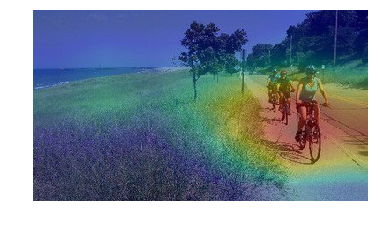

In [7]:
# simple implementation of CAM in PyTorch for the networks such as ResNet, DenseNet, SqueezeNet, Inception
import io
import requests
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import cv2

# input image
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
IMG_URL = 'http://media.mlive.com/news_impact/photo/9933031-large.jpg'

# networks such as googlenet, resnet, densenet already use global average pooling at the end, so CAM could be used directly.
model_id = 2
if model_id == 1:
    net = models.squeezenet1_1(pretrained=True)
    finalconv_name = 'features' # this is the last conv layer of the network
elif model_id == 2:
    net = models.resnet18(pretrained=True)
    finalconv_name = 'layer4'
elif model_id == 3:
    net = models.densenet161(pretrained=True)
    finalconv_name = 'features'

net.eval()

features_blobs = []
def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

net._modules.get(finalconv_name).register_forward_hook(hook_feature)

# get the softmax weight
params = list(net.parameters())
weight_softmax = np.squeeze(params[-2].data.numpy())

def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for _ in class_idx:
        temp_feature_conv = feature_conv.reshape((nc, h*w)) #512*49 we=>1000*512
        feature_mean = np.mean(temp_feature_conv, axis=1)
        top_index = np.argsort(-feature_mean)[0:20]
        cam = weight_softmax[class_idx][0][top_index].dot(temp_feature_conv[top_index])
        # cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam


normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])

response = requests.get(IMG_URL)
img_pil = Image.open(io.BytesIO(response.content))
img_pil.save('./cam_based/test.jpg')

img_tensor = preprocess(img_pil)
img_variable = Variable(img_tensor.unsqueeze(0))
logit = net(img_variable)

# download the imagenet category list
classes = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)

# output the top1 prediction
print('predicted classes: {}. probability:{:.3f}'.format(classes[idx[0].item()], probs[0]))
    
img = cv2.imread('./cam_based/test.jpg')
height, width, _ = img.shape
CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0].item()])

heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
result = heatmap * 0.3 + img * 0.5
cv2.imwrite('./cam_based/CAM.jpg', result)

plt.imshow(Image.open('./cam_based/CAM.jpg'))
plt.axis('off')
plt.show()

### 4.2 Gradient-weighted Class Activation Mapping (Grad-CAM)

Another effective way to circumnavigate the backpropagation problems were explored in the Grad-CAM that was a generalization of CAM algorithm and can generate visual explanations from any CNN-based network without requiring architectural changes.

Let the feature maps in the final convolutional layers be $F_1$, $F_2$ … ,$F_n$. Like before assume image $I_0$, a class $c$, and a classification ConvNet with the class score function $S_c(I)$.

1. Weights ($w_1$, $w_2$ ,…, $w_n$) for each pixel in the $F_1$, $F_2$ … , $F_n$ is calculated based on the gradients class $c$ w.r.t. each feature map such as $w_i = \frac{\partial S_c}{\partial F} |_{F_i} \ \forall i=1 \dots n$.
2. The weights and the corresponding activations of the feature maps are multiplied to compute the weighted activations ($A_1$,$A_2$, … , $A_n$) of each pixel in the feature maps. $A_i = w_i * F_i \ \forall i = 1 \dots n$
3. The weighted activations across feature maps are added pixel-wise to indicate importance of each pixel in the downsampled feature-importance map $H_{i,j}$ as $H_{i,j} = \sum_{k=1}^{n}A_k(i,j) \ \forall i = 1 \dots n$.

Steps 1-4 makes up the GradCAM method. Here’s how a heat map generated from Grad CAM method looks like. The best contribution from the paper was the generalization of the CAM paper in the presence of fully-connected layers.

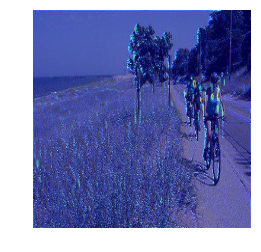

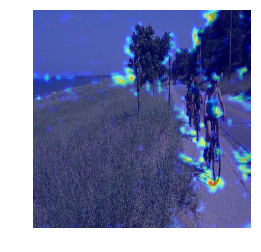

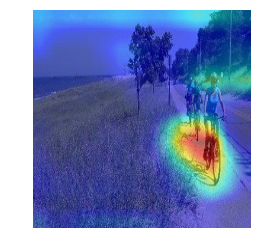

In [90]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torch.autograd import Variable
from torch.autograd import Function
from torchvision import models
from torchvision import utils
import cv2
import sys
import numpy as np


class FeatureExtractor():
    """ 
    Class for extracting activations and
        registering gradients from targetted intermediate layers 
    """

    def __init__(self, model, target_layers):
        self.model = model
        self.target_layers = target_layers
        self.gradients = []

    def save_gradient(self, grad):
        self.gradients.append(grad)

    def __call__(self, x):
        outputs = []
        self.gradients = []
        for name, module in self.model._modules.items():
            x = module(x)
            if name in self.target_layers:
                x.register_hook(self.save_gradient)
                outputs += [x]
        return outputs, x


class ModelOutputs():
    """ 
    Class for making a forward pass, and getting:
        1. The network output.
        2. Activations from intermeddiate targetted layers.
        3. Gradients from intermeddiate targetted layers. 
    """

    def __init__(self, model, target_layers):
        self.model = model
        self.feature_extractor = FeatureExtractor(self.model.features, target_layers)

    def get_gradients(self):
        return self.feature_extractor.gradients

    def __call__(self, x):
        target_activations, output = self.feature_extractor(x)
        output = output.view(output.size(0), -1)
        output = self.model.classifier(output)
        return target_activations, output


def preprocess_image(img):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]

    preprocessed_img = img.copy()[:, :, ::-1]
    for i in range(3):
        preprocessed_img[:, :, i] = preprocessed_img[:, :, i] - means[i]
        preprocessed_img[:, :, i] = preprocessed_img[:, :, i] / stds[i]
    preprocessed_img = \
        np.ascontiguousarray(np.transpose(preprocessed_img, (2, 0, 1)))
    preprocessed_img = torch.from_numpy(preprocessed_img)
    preprocessed_img.unsqueeze_(0)
    input = Variable(preprocessed_img, requires_grad=True)
    return input


def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    cv2.imwrite("./cam_based/grad_cam.jpg", np.uint8(255 * cam))
    plt.imshow(Image.open('./cam_based/grad_cam.jpg'))
    plt.axis('off')
    plt.show()


class GradCam:
    def __init__(self, model, target_layer_names, use_cuda):
        self.model = model
        self.model.eval()
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()

        self.extractor = ModelOutputs(self.model, target_layer_names)

    def forward(self, input):
        return self.model(input)

    def __call__(self, input, index=None):
        if self.cuda:
            features, output = self.extractor(input.cuda())
        else:
            features, output = self.extractor(input)

        if index == None:
            index = np.argmax(output.cpu().data.numpy())

        one_hot = np.zeros((1, output.size()[-1]), dtype=np.float32)
        one_hot[0][index] = 1
        one_hot = Variable(torch.from_numpy(one_hot), requires_grad=True)
        if self.cuda:
            one_hot = torch.sum(one_hot.cuda() * output)
        else:
            one_hot = torch.sum(one_hot * output)

        self.model.features.zero_grad()
        self.model.classifier.zero_grad()
        one_hot.backward(retain_graph=True)

        grads_val = self.extractor.get_gradients()[-1].cpu().data.numpy()

        target = features[-1]
        target = target.cpu().data.numpy()[0, :]

        weights = np.mean(grads_val, axis=(2, 3))[0, :]
        cam = np.zeros(target.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * target[i, :, :]

        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (224, 224))
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam

if __name__ == '__main__':
    image_path = './cam_based/test.jpg'
    # Can work with any model, but it assumes that the model has a
    # feature method, and a classifier method,
    # as in the VGG models in torchvision.
    grad_cam = GradCam(model=models.vgg19(pretrained=True), target_layer_names=["1"], use_cuda=False)

    img = cv2.imread(image_path, 1)
    img = np.float32(cv2.resize(img, (224, 224))) / 255
    input = preprocess_image(img)

    # If None, returns the map for the highest scoring category.
    # Otherwise, targets the requested index.
    target_index = None

    mask = grad_cam(input, target_index)
    
    show_cam_on_image(img, mask)
    #=======================================================================================================================
    grad_cam = GradCam(model=models.vgg19(pretrained=True), target_layer_names=["10"], use_cuda=False)

    img = cv2.imread(image_path, 1)
    img = np.float32(cv2.resize(img, (224, 224))) / 255
    input = preprocess_image(img)

    # If None, returns the map for the highest scoring category.
    # Otherwise, targets the requested index.
    target_index = None

    mask = grad_cam(input, target_index)
    
    show_cam_on_image(img, mask)
    #======================================================================================================================
    grad_cam = GradCam(model=models.vgg19(pretrained=True), target_layer_names=["35"], use_cuda=False)

    img = cv2.imread(image_path, 1)
    img = np.float32(cv2.resize(img, (224, 224))) / 255
    input = preprocess_image(img)

    # If None, returns the map for the highest scoring category.
    # Otherwise, targets the requested index.
    target_index = None

    mask = grad_cam(input, target_index)
    
    show_cam_on_image(img, mask)

## Discussions

In this presentation, we introduct several methods to interpret neural network. We have so far understood both basic algorithms as well as gradient-based methods. Computationally and practically, the gradient-based methods are computationally cheaper and measure the contribution of the pixels in the neighborhood of the original image. For more methods, you can check these techniques as following:

1. [Filter visulization & occlusion experiments & transpose convolution ](https://arxiv.org/pdf/1311.2901.pdf)
2. [Guided backpropagation](https://arxiv.org/pdf/1412.6806.pdf)

# Assignments

Q1: For class prototype generation, in the above demo, the input is filled with zeros. What you need to do is to initialize the input with digit `8` and generate the target class prototype of digit `3` and `1`.

Hints: You can use digit `8` as input, where a typical digit `8` image is saved in `dataset/test_imgs/8.png`.

Q2: In the visulization of CAM, the class activation map for class $c$, $M_c$, is calculated by the weighted($w^c$) product of all feature maps(512 feature maps in ResNet18) in last convolutional layer. Could you use the 20 feature maps with max activation value to visulize CNNs？

Hints: 
1. You can use arithmetic mean to indicate the activation value for one feature map.
2. A recommendable way is to modify the function `returnCAM`.
3. You need to have a clear understanding for how to index and slice numpy arrays.

Q3: Grad-CAM is the generation of CAM and it can visulize CNNs on multiple layers except for last convolutional layer. Please finish the visulization on the intermediate layer and the layer near the input.

Hints: What you need to do is to finetune that demo of Grad-CAM.

## Reference

1. https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-visualizing-convolutional-neural-networks/
2. https://github.com/zhangrong1722/understanding_cnn
3. http://blog.qure.ai/notes/deep-learning-visualization-gradient-based-methods#1509.06321
4. Simonyan, K., Vedaldi, A., & Zisserman. Deep inside convolutional networks: Visualising image classification models and saliency maps. arXiv preprint arXiv:1312.6034.
5. Zeiler, M. D., & Fergus, R.. Visualizing and understanding convolutional networks. In ECCV.
6. Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D., & Batra, D.. Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization. In CVPR.
7. Zhou, B., Khosla, A., Lapedriza, A., Oliva, A., & Torralba, A.. Learning deep features for discriminative localization. In CVPR.